# Distribuições de Probabilidade

### Média e Variância

São os 2 números frequentemente usados para definir uma distribuição de probabilidade para a V.A. X.

A média (valor esperado) de X, é:

$ \mu = E(X) = \sum_{i=1}^{n} x_i*f(x_i)$

E a variância de X, denotada por $\sigma^2$ ou V(X), é:

$ \sigma^2 = V(X) = E(X-E(X))^2 = E(X^2)-E(X)^2$

Há também outros dois conceitos que nos ajudam a explorar o universo das distribuições de probabilidade, fazendo parte do conceito maior de momento.

* Assimetria de X:

$\gamma = E[(\frac{X-E(X)}{\sigma})^3] = \frac{E(X^3)-3E(X)E(X^2)+2E(X)^3}{[E(X^2)-E(X)^2]^3}$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/434px-Relationship_between_mean_and_median_under_different_skewness.png)

* Curtose de X:

$\beta = E[(\frac{X-E(X)}{\sigma})^4]=\frac{E(X^4)-4E(X)E(X^3)+6E(X^2)E(X)^2-3E(X)^4}{[E(X^2)-E(X)^2]^2}$

![](https://media-exp1.licdn.com/dms/image/C4E12AQFrAz727TiArg/article-inline_image-shrink_1000_1488/0/1520519998561?e=2147483647&v=beta&t=KcRlV3822t1kC24DJmlpwC3cJ6hA7CTrp4miuI3vFKo)

$C = \frac{Q_3-Q_1}{2(P_{90}-P_{10})}$

* C = 0.263: Distribuição Mesocúrtica (Distribuição Normal);
* C>0.263: Distribuição Platicúrtica;
* C<0.263: Distribuição Leptocúrtica.

**Obs.:** Usamos essas métricas para caracterizar diferentes distribuições: normal, t-student, chi-quadrado, etc.

### Normal

In [12]:
#Importando o módulo norm (distribuição normal padrão --> média 0 e desvio-padrão 1)
from scipy.stats import norm

In [13]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print('média: {}, variância: {}, assimetria: {}, curtose: {}'.format(mean, var, skew, kurt))

média: 0.0, variância: 1.0, assimetria: 0.0, curtose: 0.0


Para deslocar ou mudar a escala da distribuição, i.e. informar média e desvio-padrão, pode-se infomar os parâmetros loc e scale, respectivamente. Exemplo:

In [14]:
mean, var, skew, kurt = norm.stats(loc=2, scale=0.5, moments='mvsk')
print('média: {}, variância: {}, assimetria: {}, curtose: {}'.format(mean, var, skew, kurt))

média: 2.0, variância: 0.25, assimetria: 0.0, curtose: 0.0


Para calcular a fdp para um número real x, fazemos:

In [15]:
x = 1
print(norm.pdf(x))

0.24197072451914337


![](https://i.ytimg.com/vi/ec9HWoY2kt8/maxresdefault.jpg)

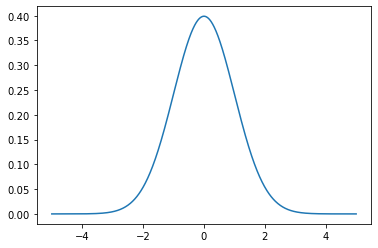

In [16]:
#Podemos calcular a fdp para cada elemento de um array:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5,1000)
plt.plot(x, norm.pdf(x))
plt.show()

A função de distribuição acumulada pode ser calculada de maneira muito similar, usando a função cdf:

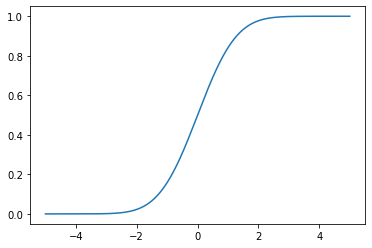

In [17]:
plt.plot(x, norm.cdf(x))
plt.show()

# Estimação e Inferência

![](https://www.inf.ufsc.br/~andre.zibetti/probabilidade/img/inferencia.png)

* **Estimativa pontual:** Estimativa única de um parâmetro populacional.
* **Estimativa intervalar:** Dá um intervalo de valores possíveis, no qual se admite esteja o parâmetro populacional.

|Parâmetro Populacional|Pontual|Intervalar|
|:--------------------:|:-----:|:--------:|
|Média|O americano médio consome 40 lb de carne por ano.|O consumo médio de carne no país está entre 30 e 50 lb por pessoa por ano.|
|Proporção|22% da população se opõe a um aumento do limite de velocidade.|Entre 18% e 26% da população há oposição a um aumento do limite da velocidade.|
|Desvio-padrão|O desvio-padrão da quilometragem de um pneu radial é de 2000 milhas.|O desvio-padrão da quilometragem de um pneu radial está entre 1500 e 2500 milhas.|

## Fundamentos lógicos da estimação


**Exemplo:** Uma amostra de alunos da turma 850 foi extraída, observando-se uma média de 24,2 anos.

**Pergunta:** Sabemos que este é um valor possível da distribuição amostral, mas a questão é: qual deles?

Quão próximo da média 24,2 está?

![](https://drive.google.com/uc?export=view&id=1rQB8KOw2nkO1Ek0uQuFmAAeqI_M98h_2)

**Supondo distribuição normal:**

![](https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG)

Vimos pelo Teorema Central do limite que uma certa estatística Z:

$Z = \frac{\overset{-}{X} - \mu}{\sigma/\sqrt{n}} \sim 𝑁(\mu=0,\sigma^2=1)$

Fixando um nível de confiança $\gamma = (1-\alpha)100\%$:

$P(-z_{\alpha/2} \le Z \le z_{\alpha/2})=P(-z_{\alpha/2} \le \frac{\overset{-}{X} - \mu}{\sigma/\sqrt{n}} \le z_{\alpha/2}) = 1-\alpha$

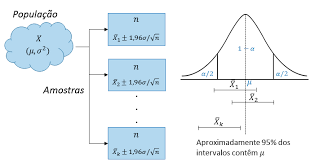

Reescrevendo:

$P(-z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \le \overset{-}{X} - \mu \le z_{\alpha/2} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$


$P(-z_{\alpha/2} \frac{\sigma}{\sqrt{n}} -\overset{-}{X} \le - \mu \le z_{\alpha/2} \frac{\sigma}{\sqrt{n}} - \overset{-}{X}) = 1-\alpha$

$P(\overset{-}{X}-z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \le \mu \le \overset{-}{X}+z_{\alpha/2} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$

O I.C. de (1-α)100% para a média populacional μ, com $\sigma^2$ conhecido.

**Interpretação:** Estamos (1-α)100% confiantes de que o intervalo **contém** o verdadeiro valor do parâmetro.

O que nós lemos na aula anterior:

$P(X-\sigma<\mu<X+\sigma)=0.68$

$P(X-2\sigma<\mu<X+2\sigma)=0.95$

$P(X-3\sigma<\mu<X+3\sigma)=0.997$

**Questão:** O que isso quer dizer para a gente?
* Nível de confiança do intervalo;
* Erro máximo esperado.

![](https://drive.google.com/uc?export=view&id=1-5de4RoW5ouXPL98P33lpyrPx1hNrCkG)

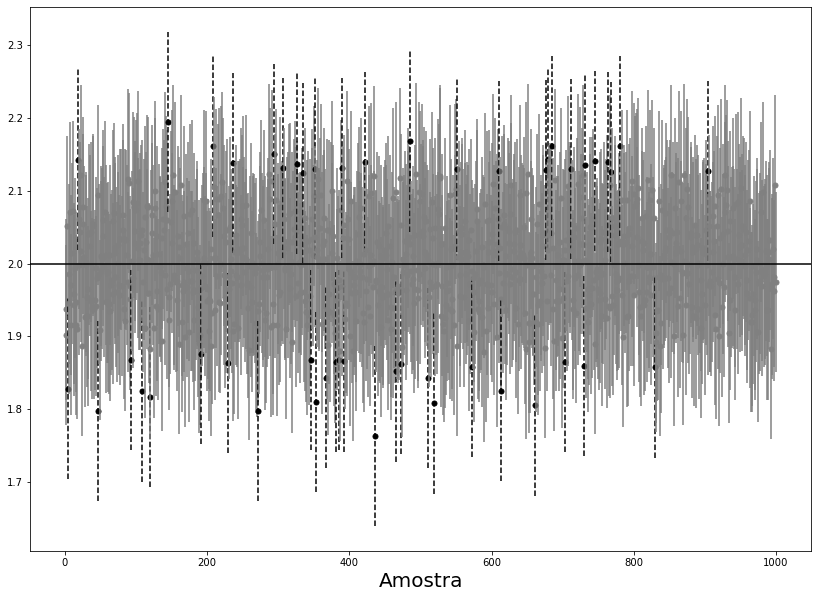

Nível de confiança: 0.95
Fraçao de intervalos que contém a média: 0.951


In [18]:
import numpy as np

n = 1000 # tamanho da amostra
Ns = 1000 # numero de intervalos
mu = 2 # media populacional
sigma = 2 # desvio padrão populacional
beta = 0.95 # nivel de confianca
zalpha = 1.96 # valor de z (a partir de beta)
c = 0 # conta o numero de intervalos que contem a media
plt.figure(figsize=(14,10))
for s in range(1,Ns+1):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    IC1 = np.mean(x) - zalpha*sigma/np.sqrt(n) #intervalo inferior
    IC2 = np.mean(x) + zalpha*sigma/np.sqrt(n) #intervalo superior
    if(mu > IC1 and mu < IC2):
        c =  c + 1
        # mostra o intervalo em cinza se continar a media
        plt.vlines(s, ymin=IC1, ymax=IC2, color = 'gray')
        plt.plot(s,np.mean(x), 'o', color = 'gray', 
                 markersize=5)
    else:
        # mostra o intervalo que nao contem a media
        plt.vlines(s, ymin=IC1, ymax=IC2, color = 'black', linestyles = 'dashed')
        plt.plot(s,np.mean(x), 'o', color = 'black',
                 markersize=5)
plt.axhline(y = mu, color = 'black') # mostra a media populacional
plt.xlabel('Amostra', fontsize=20)
plt.show()
print('Nível de confiança:', beta)
print('Fraçao de intervalos que contém a média:', c/Ns)

**Nível de confiança:** Fração de intervalos que contém a média.

## Intervalo de confiança

Nosso intervalo tem a forma $\overset{-}{x} \pm z \sigma_\overset{-}{x}$.

**Exemplo:** Um intervalo de 95% para a média com $\overset{-}{x}=24,2$ seria:

$24,2 \pm 1.96 \sigma_\overset{-}{x}$

### Estimativa da média de uma população:

**Com σ conhecido**:

* Estimativa pontual de $\mu_x$: $\overset{-}{x}$
* Estimativa intervalar de $\mu_x$: $\overset{-}{x} \pm z \sigma_\overset{-}{x}$

Em que:

$\sigma_\overset{-}{x} = \sigma_x/\sqrt{n}$

Podemos agora construir alguns intervalos de confiança para a idade média dos alunos da sala 850 usando nossa média amostral de 24.2. Para isso, devemos considerar o tamanho da amostra (n) e o desvio-padrão populacional (σ).

Suponhamos $n=36$ e $\sigma_x = 3.0$. 

In [19]:
#Nível de confiança de 90% --> alpha = 0.1 --> alpha/2 = 0.05
x_medio = 24.2
#Z que tem a probabilidade de 0.5-0.05 = 0.45
z_alpha_2 = 1.645
#Calculando o desvio-padrão da distribuição amostral
sigma_x = 3/(36**0.5)
limite_inf = x_medio-z_alpha_2*sigma_x
limite_sup = x_medio+z_alpha_2*sigma_x
print(limite_inf,limite_sup)

23.377499999999998 25.0225


In [20]:
#Calculando um I.C. para um Nível de confiança de 90, 95 e 99%
print(norm.interval(0.9, loc=24.2, scale=3/6))

(23.377573186524263, 25.022426813475736)


In [21]:
print(norm.interval(0.95, loc=24.2, scale=3/6))

(23.220018007729973, 25.179981992270026)


In [22]:
print(norm.interval(0.99, loc=24.2, scale=3/6))

(22.91208534822555, 25.48791465177445)


|Confiança desejada|z|Fórmula|Cálculo|erro|Intervalo|
|:----------------:|:-:|:---:|:-----:|:--:|:-------:|
|90%|1.65|$\overset{-}{x} \pm 1.65 \frac{\sigma_x}{\sqrt{n}}$|$24.2 \pm 1.65 \frac{3}{\sqrt{36}}$|$24.2 \pm 0.825$|23.375 a 25.025|
|95%|1.96|$\overset{-}{x} \pm 1.96 \frac{\sigma_x}{\sqrt{n}}$|$24.2 \pm 1.96 \frac{3}{\sqrt{36}}$|$24.2 \pm 0.980$|23.220 a 25.180|
|99%|2.58|$\overset{-}{x} \pm 2.58 \frac{\sigma_x}{\sqrt{n}}$|$24.2 \pm 2.58 \frac{3}{\sqrt{36}}$|$24.2 \pm 1.290$|22.912 a 25.488|

![](https://drive.google.com/uc?export=view&id=1UYipyQmFZESoeSJpXh-HKPK6gFdZIPQ5)

* Nós podemos querer especificar o erro associado à dispersão de uma população, dado o tamanho de uma amostra e o nível de confiança.

$e = z \frac{\sigma_x}{\sqrt{n}}$

* Em alguns casos, contudo, podemos querer especificar um erro tolerável e achar o tamanho da amostra necessária para gerar aquele erro.

$n = (z \frac{\sigma_x}{e})^2$

Logo, o tamanho da amostra dependerá:

1. O grau de confiança desejado (z);
2. A quantidade de dispersão entre os valores individuais da população ($\sigma_x$);
3. Certa quantidade específica de erro tolerável.

**Desvio-padrão (σ) desconhecido:** Distribuição t de Student

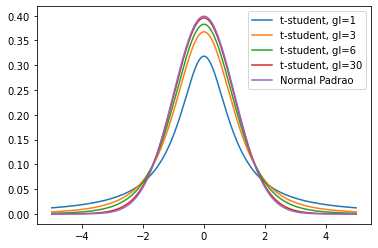

In [33]:
from scipy.stats import t
x = np.linspace(-5, 5,1000)
plt.plot(x, t.pdf(x,1)) #df --> grau de liberdade da distribuição (n-1)
plt.plot(x, t.pdf(x,3))
plt.plot(x, t.pdf(x,6))
plt.plot(x, t.pdf(x,30))
plt.plot(x, norm.pdf(x))
plt.legend(['t-student, gl=1', 't-student, gl=3', 't-student, gl=6', 't-student, gl=30', 'Normal Padrao'])
plt.show()

**Com σ desconhecido:**

* Estimativa pontual de $\mu_x$: $\overset{-}{x}$
* Estimativa intervalar de $\mu_x$: $\overset{-}{x} \pm t \frac{S_\overset{-}{x}}{\sqrt{n}}$

Em que:

$S_\overset{-}{x} = \sqrt{\frac{\sum_{k=1}^{N} (x-\overset{-}{x})^2}{n-1}}$



**Exemplo:** Suponha agora que temos uma amostra com a média de 20 anos, um desvio-padrão amostral de 1.5 e tamanho da amostra de 25.

In [34]:
x_medio = 20
s = 1.5
n = 25 #g.l. = n-1 = 24
alpha_2 = 0.05
t_alpha_2 = 1.711
limite_inf = x_medio-t_alpha_2*s/(25**0.5)
limite_sup = x_medio+t_alpha_2*s/(25**0.5)

In [35]:
print(limite_inf,limite_sup)

19.4867 20.5133


In [36]:
# Calculando um I.C. para um Nível de confiança de 90, 95 e 99%
print(t.interval(0.9, loc=20, scale=1.5/5,df=24))

(19.48673537602717, 20.513264623972827)


In [37]:
print(t.interval(0.95, loc=20, scale=1.5/5,df=24))

(19.380830431511594, 20.619169568488406)


In [38]:
print(t.interval(0.99, loc=20, scale=1.5/5,df=24))

(19.160918148568157, 20.839081851431843)


|Confiança desejada|t|Fórmula|Cálculo|erro|Intervalo|
|:----------------:|:-:|:---:|:-----:|:--:|:-------:|
|90%|1.711|$\overset{-}{x} \pm t \frac{S_x}{\sqrt{n}}$|$20 \pm 1.711 \frac{1.5}{\sqrt{25}}$|$20 \pm 0.513$|19.487 a 20.513|
|95%|2.064|$\overset{-}{x} \pm t \frac{S_x}{\sqrt{n}}$|$20 \pm 2.064 \frac{1.5}{\sqrt{25}}$|$20 \pm 0.619$|19.381 a 20.619|
|99%|2.797|$\overset{-}{x} \pm t \frac{S_x}{\sqrt{n}}$|$20 \pm 2.797 \frac{1.5}{\sqrt{25}}$|$20 \pm 0.839$|19.161 a 20.839|

### Intervalo de confiança para a variância de uma população normal

Nós também podemos querer estimar a variância ou o desvio-padrão.

Se $X_1, X_2,..., X_n$ for uma V.A. de uma distribuição normal, com média μ e variância $\sigma^2$ e seja $S^2$ a variância da amostra. Então a V.A.

$X^2=\frac{(n-1)S^2}{\sigma^2}$

tem uma distribuição qui-quadrado $(\chi^2)$, com $n-1$ graus de liberdade.

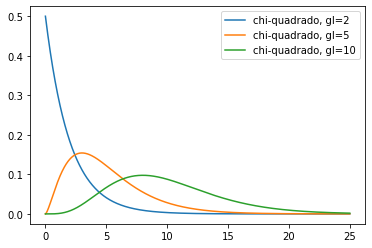

In [42]:
from scipy.stats import chi2
x = np.linspace(0, 25,1000)
plt.plot(x, chi2.pdf(x,df=2))
plt.plot(x, chi2.pdf(x,df=5))
plt.plot(x, chi2.pdf(x,df=10))
plt.legend(['chi-quadrado, gl=2', 'chi-quadrado, gl=5', 'chi-quadrado, gl=10'])


* A variável é não-negativa;
* A distribuição de probabilidades é deslocada para direita;
* À medida que k aumenta, a distribuição se torna mais simétrica;
* $k \rightarrow ∞$, a forma limite da distribuição é a normal.

Queremos construir um intervalo com $100(1-\alpha)\%$ de confiança e $n-1$ graus de liberdade.

$P(\chi^2_{(1-\alpha/2),n-1} \le X^2 \le \chi^2_{(\alpha/2),n-1}) = 1-\alpha$

Como $X^2=\frac{(n-1)S^2}{\sigma^2}$

Podemos dizer que:

$P(\chi^2_{(1-\alpha/2),n-1} \le \frac{(n-1)S^2}{\sigma^2} \le \chi^2_{(\alpha/2), n-1}) = 1-\alpha$

Que podemos rearranjar da seguinte forma:

$P(\frac{(n-1)S^2}{\chi^2_{(\alpha/2), n-1}} \le \sigma^2 \le \frac{(n-1)S^2}{\chi^2_{(1-\alpha/2),n-1}}) = 1-\alpha$

Assim, esse será um **intervalo de confiança de 100(1-α)%** para a $\sigma^2$.

In [50]:
chi2.interval(0.95,19,scale=0.0153)

(0.13626970217441597, 0.5026406009844643)

# Exercícios

In [ ]:
from scipy import stats 
import numpy as np 
import matplotlib.pyplot as plt 

Suponha que você tenha feito vários cenários para a previsão de um indicador econômico. Faça o gráfico do intervalo de confiança para a estimativa média desse indicador. Use diferentes quantidades de amostras para a estimação do valor médio do indicador a cada instante de tempo e faça o gráfico da média e do intervalo de confiança. 

In [ ]:
def forecasts(n, sigma=1.0):
  return 10*(1 - 1/np.exp(np.linspace(0,40,n))) + np.random.normal(0, sigma, n)

In [ ]:
y1 = forecasts(1000)
y2 = forecasts(1000)
y3 = forecasts(1000)
y4 = forecasts(1000)

y_mean = (y1 + y2 + y3 + y4)/4

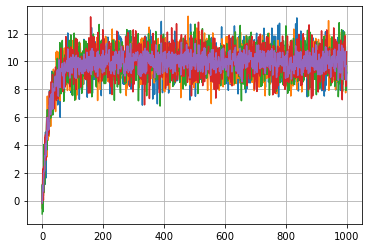

In [ ]:
plt.grid()
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)
plt.plot(y_mean)


In [ ]:
y_forecast = []
for i in range(1000):
    y_forecast.append(forecasts(100, sigma=1.0))

np_forecast = np.array(y_forecast)
np_forecast.shape

(1000, 100)

In [ ]:
mean_ = np.mean(np_forecast, axis=0)

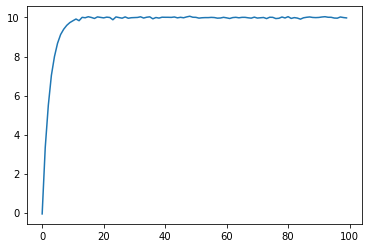

In [ ]:
plt.plot(mean_)

In [ ]:
mean_ = np.mean(np_forecast, axis = 0)
std_ = np.std(np_forecast, axis = 0)

conf_ = 1.96*std_/np.sqrt(1000)

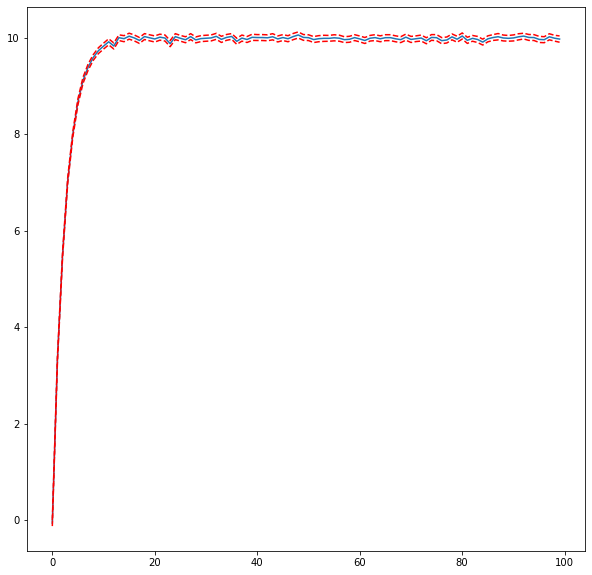

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(mean_)
plt.plot(mean_ + conf_, '--r')
plt.plot(mean_ - conf_, '--r')

Lembrete: o mesmo vale quando queremos calcular a estimativa média e o intervalo de confiança para a previsão de uma série temporal usando algum modelo de Machine Learning (ou algum método estatístico). 

Seja uma distribuição lognormal, com a função mostrada abaixo.

f(x, $\mu$, $\theta$) = $\frac{1}{x\sqrt{2\pi\theta}}$ $e^{(-\frac{1}{2\theta}(ln(x) - \mu)}$

Vamos supor que a média dessa distribuição é dada $\mu = 0$ e queremos estimar o parâmetro desconhecido $\theta$. Não chegamos (e nem iremos nesse curso) mostrar como se determina a função matemática desses estimadores, que geralmente é feito utilizando métodos de momentos ou máxima verossimilhança. 

Contudo, não tem problema nesse caso. Como essas distribuições são conhecidas, podemos apenas pesquisar quais são tais estimadores. 
Procure na internet qual é o estimador para tal parâmetro. Em seguida, calcule qual é o valor estimado desse parâmetro.



In [ ]:
rng = np.random.random(1)
lognorm = stats.lognorm(np.sqrt(rng))

In [ ]:
rng

In [ ]:
values = lognorm.rvs(size=20000)

In [ ]:
plt.hist(values,bins=50);

Faça uma simulação de Monte Carlo para investigar a estimativa média do parâmetro desconhecido. Como você possui 20000 valores dessa distribuição, faça 100 simulações com 200 amostras cada. Faça o gráfico da média da estimativa em função das simulações 

Vemos no início da aula que podemos estabelecer um intervalo de confiança para a estimação do desvio padrão de uma distribuição normal. Vamos verificar empiricamente como isso funciona. 

Lembrando que:

$P(\frac{(n-1)S^2}{\chi^2_{\alpha/2,n-1}} \le \sigma^2 \le \frac{(n-1)S^2}{\chi^2_{1-\alpha/2,n-1}}) = 1-\alpha$

Construa um intervalo de confiança para esse parâmetro, supondo $\alpha$ = 0.05 e um tamanho de amostras igual a 200.

Rode essa subamostragem 100 vezes e determine a quantidade de vezes no qual a estimativa está dentro do intervalo de confiança